
### Data Set Information
This data set contains 150 iris record, each iris has four useful numerical information (sepal length, spetal width, petal lenght, petal width) all in cm unit. By knowing this information, iris classify to three main classes:Setosa ,Versicolor and Virginica.

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Our mission is to fit a classifier model, and evaluating with non seen data(test data) in a way to chooes the model has the best effeicient and accuracy score.

So let's see how could this be done...

##Import some required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Read and Exploring the data

In [2]:
import sklearn.datasets as datasets
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['target']=iris.target

In [4]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df.shape

(150, 5)

## Clean the data

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Visualizeing the relation between features

In [9]:
nclass1=df[df['target']==0].count()[0]
nclass2=df[df['target']==1].count()[0]
nclass3=df[df['target']==2].count()[0]

print('count of iris belong to {} class  :'.format(iris.target_names[0]),nclass1)
print('count of iris belong to {} class :'.format(iris.target_names[1]),nclass2)
print('count of iris belong to {} class :'.format(iris.target_names[2]),nclass3)

count of iris belong to setosa class  : 50
count of iris belong to versicolor class : 50
count of iris belong to virginica class : 50


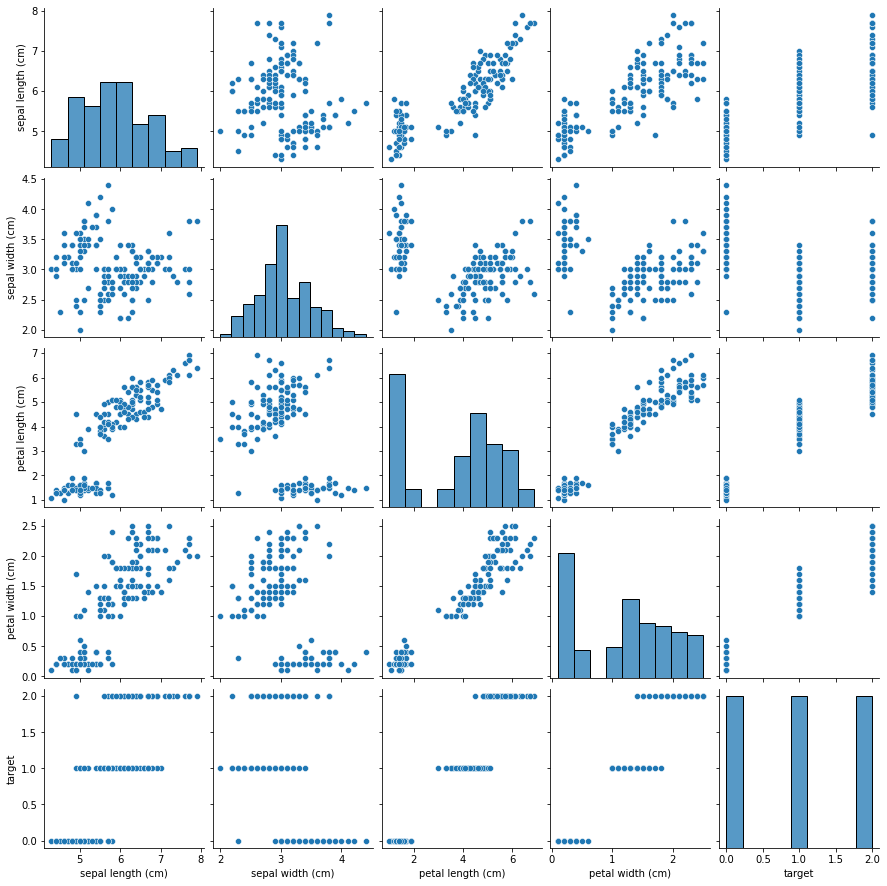

In [10]:
sns.pairplot(df)

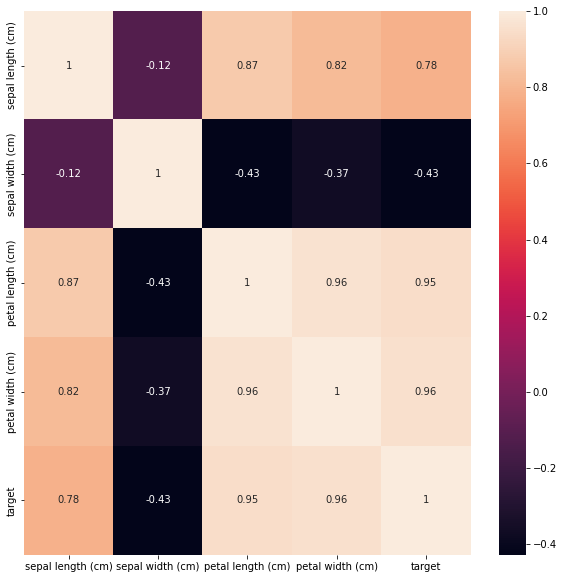

In [11]:
f, ax = plt.subplots(figsize=(10, 10))
ax=sns.heatmap(df.corr(),annot=True )

## preprocessing

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics

In [13]:
X =df.iloc[:,:-1]
y =df.iloc[:,-1:]

In [14]:
sss =StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index,:], y.iloc[test_index,:]
X_train.shape

(135, 4)

In [15]:
print(X_train.shape[0],'train samples')
print(y_train[y_train['target']==0].shape[0],' {}'.format(iris.target_names[0]),y_train[y_train['target']==1].shape[0],
      ' {}'.format(iris.target_names[1]),y_train[y_train['target']==2].shape[0],' {}'.format(iris.target_names[2]))
print(X_test.shape[0],'test samples')
print(y_test[y_test['target']==0].shape[0],' {}'.format(iris.target_names[0]),y_test[y_test['target']==1].shape[0],
      ' {}'.format(iris.target_names[1]),y_test[y_test['target']==2].shape[0],' {}'.format(iris.target_names[2]))

135 train samples
45  setosa 45  versicolor 45  virginica
15 test samples
5  setosa 5  versicolor 5  virginica


## Define some methods we will use

In [16]:
# this method pass to it a dictionry of classifiers, training data wanna fit classifiers on, and testing data
from sklearn import metrics
def fit_test(classifiers,X_train,y_train,X_test,y_test,fit_option=True):
    result =pd.DataFrame(columns=['model Name','Train Accuracy','Test Accuracy','f1 score setosa'\
                                 ,'f1 score versicolor', 'f1 score virginica'])
    for index, (name, classifier) in enumerate(classifiers.items()):
        if fit_option == True:
            classifier.fit(X_train, y_train)
        
        y_pred = classifier.predict(X_test)
        test_accuracy = metrics.accuracy_score(y_test, y_pred)
        train_accuracy =classifier.score(X_train,y_train)
        
        f1_scores =metrics.f1_score(y_pred,y_test,average=None)
        result=result.append({'model Name':name,'Train Accuracy':train_accuracy,'Test Accuracy':test_accuracy\
                             ,'f1 score setosa':f1_scores[0],'f1 score versicolor':f1_scores[1],'f1 score virginica':f1_scores[2] }
                             ,ignore_index=True)
        
    return result



# Classification by Supervised Learning

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [18]:
classifiers = {
    "LogisticRegression": LogisticRegression(
        penalty='l1',solver='liblinear',max_iter=1000 ,l1_ratio =0.9,tol=0.00001
    ),
    "MLPClassifier": MLPClassifier(
        solver='sgd', max_iter=2000, alpha=0.00001,learning_rate_init=0.001,activation='logistic',validation_fraction=0.2, hidden_layer_sizes=(70,)
    ),
    "DecisionTree": DecisionTreeClassifier(),
    
    "Linear SVC": SVC(C=10,kernel="poly",degree=4,  probability=True, random_state=0)
}

In [19]:
result = fit_test(classifiers,X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/li

In [20]:
result

,model Name,Train Accuracy,Test Accuracy,f1 score setosa,f1 score versicolor,f1 score virginica
0,LogisticRegression,0.962963,0.933333,1.0,0.909091,0.888889
1,MLPClassifier,0.970370,1.000000,1.0,1.000000,1.000000
2,DecisionTree,1.000000,0.933333,1.0,0.909091,0.888889
3,Linear SVC,0.977778,0.933333,1.0,0.909091,0.888889


### From the evaluation process the best model could be choosen is MLPClassifier, MLPClassifier could predict all test data to thier right classes.

## Additional section in How can Decision Tree model could graph

In [21]:
# Install required libraries for visualizing the descision tree model
!pip install pydotplus
!apt-get install graphviz -y
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


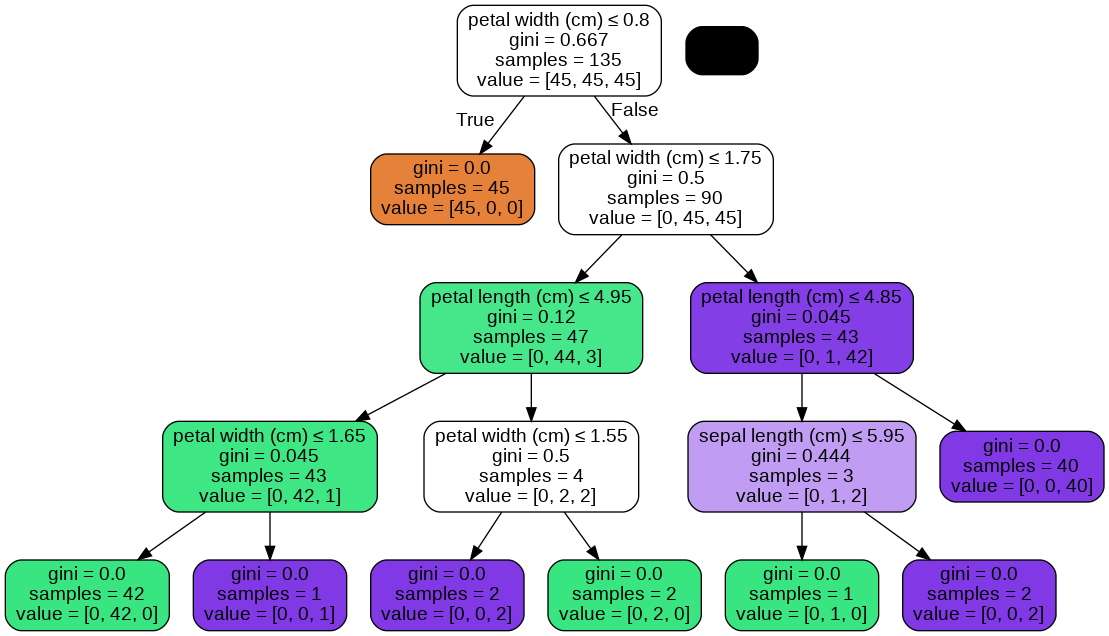

In [22]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dtree=classifiers.get('DecisionTree')
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())